# MA6202: Laboratorio de Ciencia de Datos

### **Profesor:** Nicolás Caro

### 12/07/2020 - Tarea 2


### **Integrantes del grupo**: 

# Pregunta 1: Carga y transformacion de datos.

In [ ]:
#Estas lineas corren solo en google colab:
import os.path 
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  if os.path.exists('/content/ChestXRay2017.zip'):
    print("Datos ya descargados")
  else:
    !wget https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip
    !unzip /content/ChestXRay2017.zip

In [ ]:
import torch
import torchvision
from torchvision.datasets.folder import default_loader

In [ ]:
# Torchvision transforms compose para carga de datos con transformacion:
root = '/content/chest_xray/train/'

degrees = (-20,20)
transformer = torchvision.transforms.Compose([
    # Escalamiento                                          
    torchvision.transforms.Resize(size = (224,224)),
    # Rotacion con p=0.5
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    # Rotacion entre -20 y 20 grados
    torchvision.transforms.RandomRotation(degrees),
    # Multiplicacion de canales de brillo
    torchvision.transforms.ColorJitter(brightness=[1.2, 1.5]),
    torchvision.transforms.ToTensor(), 
    ])

loader = torchvision.datasets.ImageFolder(root = root,
                                          transform = transformer)

data_train1 = torchvision.datasets.DatasetFolder(root='/content/chest_xray//train', 
                                                 loader=default_loader, 
                                                 transform=transformer, 
                                                 extensions='jpeg')
data_test1 = torchvision.datasets.DatasetFolder(root='/content/chest_xray//test',
                                                loader=default_loader,
                                                transform=transformer, 
                                                extensions='jpeg')


In [ ]:
print(loader.__len__())
print(data_train1.__len__())
print(data_test1.__len__())

5232
5232
624


In [ ]:
print((data_train1[0]))
tensor_image = data_train1[0][0].permute(1, 2, 0)
#tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2], tensor_image.shape[0])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 0)


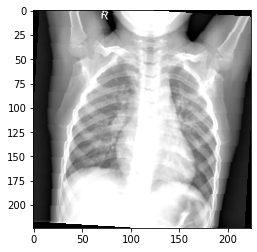

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(tensor_image)